# 1. Preliminary

## 1.1 Context

* We will analyze a very well known NLP dataset: tweets from disaster


* It is a Kaggle competition, which offers a simple but good level textual dataset to be able to make its weapons in NLP


* The dataset is here [https://www.kaggle.com/competitions/nlp-getting-started/data]


* Please use the **train** dataset


* In this 1st part we are going to clean the text

## 1.2 Requirements

You have to install  : 

* pandas
* numpy
* matplotlib
* seaborn


* nltk
* wordcloud
* pillow


* pandarallel

## 1.3 Imports

In [2]:
# builtin
import os, sys, time, random


# data
import pandas as pd
import numpy as np


# NLP
import nltk
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.tokenize import word_tokenize, wordpunct_tokenize
from nltk.corpus import words
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer

# import spacy


# viz
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from PIL import Image

# import plotly as px

from pandarallel import pandarallel

## 1.4 Downloads and options

In [ ]:
# download

"""
nltk.download('omw-1.4')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('words')
"""

In [3]:
# pandarallel

pandarallel.initialize(progress_bar=True, 
                       nb_workers=6, 
                       # verbose=1
                      )

INFO: Pandarallel will run on 6 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.


In [4]:
# init sns

sns.set()

## 1.5 Loading data

In [5]:
# our file

data = "./data/cleaned/"
os.listdir(data)

['min_10_words.csv', 'min_5_words.csv', 'df_cleaned.csv', 'unique_words.csv']

In [6]:
# load dataframe

fn = data + 'df_cleaned.csv'
df = pd.read_csv(fn)
df.head()

,text,target
0,Our Deeds are the Reason of this #earthquake M...,1
1,Forest fire near La Ronge Sask. Canada,1
2,All residents asked to 'shelter in place' are ...,1
3,"13,000 people receive #wildfires evacuation or...",1
4,Just got sent this photo from Ruby #Alaska as ...,1


In [7]:
df.shape

(7503, 2)

In [ ]:
df = df.sample(frac=0.3)

In [ ]:
df.shape

# 2. Work on a specific document

In [9]:
# select a random document

doc = df.text.sample(1)
doc = doc.values[0]
doc

'A better look at what this catastrophic rain and flooding has done to our\x89Û_ https://t.co/5yRBegzafX'

## 2.1 Lower

In [10]:
# lower

doc = doc.lower()
doc

'a better look at what this catastrophic rain and flooding has done to our\x89û_ https://t.co/5yrbegzafx'

## 2.2 Tokenization

In [11]:
# tokenize

tokens = word_tokenize(doc)
tokens

['a',
 'better',
 'look',
 'at',
 'what',
 'this',
 'catastrophic',
 'rain',
 'and',
 'flooding',
 'has',
 'done',
 'to',
 'our\x89û_',
 'https',
 ':',
 '//t.co/5yrbegzafx']

In [12]:
len(tokens)

17

In [13]:
len(set(tokens))

17

In [14]:
def display_tokens_info(tokens) : 
    """display info about corpus """
    
    print(f"nb tokens {len(tokens)}, nb tokens uniques {len(set(tokens))}")
    print(tokens[:30])

In [15]:
# an other tokenize

tokens = wordpunct_tokenize(doc)
display_tokens_info(tokens)

nb tokens 23, nb tokens uniques 23
['a', 'better', 'look', 'at', 'what', 'this', 'catastrophic', 'rain', 'and', 'flooding', 'has', 'done', 'to', 'our', '\x89', 'û_', 'https', '://', 't', '.', 'co', '/', '5yrbegzafx']


## 2.3 Stopwords

In [16]:
# stop_words

stop_words = set(stopwords.words('english'))
print(stop_words)

{"you'll", "wouldn't", 'ma', 'be', 'here', "weren't", 'below', 'myself', 'all', 'themselves', 'into', 're', "isn't", 'been', 'don', 'didn', 'who', 'have', 'can', 'being', 'hers', 'yourself', "shan't", 'again', "don't", "you're", 'under', 'had', 'now', 'mustn', 'in', 'ourselves', "mustn't", "mightn't", 'are', 'our', 'them', "should've", 'has', 'when', "needn't", 'these', 'from', 'down', 'won', "shouldn't", 've', 'itself', 'both', "wasn't", 'hasn', 'isn', 'its', 'or', 'll', 'ain', 'to', 'so', 'my', 'during', 'their', 'those', 'between', 'an', 'we', 'very', 'is', 'and', 'this', 'any', 'only', 'd', "you've", 'were', 'will', 'for', 'he', 'a', 'which', 'than', 'shouldn', 'should', 'couldn', 'before', 'with', "hadn't", "couldn't", "it's", 'i', 'wouldn', 'about', "you'd", 'him', 'through', 'out', 's', 'does', 'am', 'few', "haven't", 'other', 'then', 'just', 'of', 'at', 'above', 'himself', 'doing', 'whom', 'his', 'most', 'her', 'yourselves', 'hadn', 'each', 'mightn', 'shan', 'haven', 'weren', '

In [17]:
tokens = [w for w in tokens if w not in stop_words]
display_tokens_info(tokens)

nb tokens 14, nb tokens uniques 14
['better', 'look', 'catastrophic', 'rain', 'flooding', 'done', '\x89', 'û_', 'https', '://', '.', 'co', '/', '5yrbegzafx']


In [18]:
# an other tokenizer

tokenizer = RegexpTokenizer(r"\w+")
tokens = tokenizer.tokenize(doc)
display_tokens_info(tokens)

nb tokens 19, nb tokens uniques 19
['a', 'better', 'look', 'at', 'what', 'this', 'catastrophic', 'rain', 'and', 'flooding', 'has', 'done', 'to', 'our', 'û_', 'https', 't', 'co', '5yrbegzafx']


In [19]:
# remove stopwords

tokens = [w for w in tokens if w not in stop_words]
display_tokens_info(tokens)

nb tokens 10, nb tokens uniques 10
['better', 'look', 'catastrophic', 'rain', 'flooding', 'done', 'û_', 'https', 'co', '5yrbegzafx']


## 2.4 First cleaning function

In [20]:
def process_text_1(doc, rejoin=False) : 
    """basic function of text processing """
    
    # lower
    doc = doc.lower().strip()
    
    # tokenize
    tokenizer = RegexpTokenizer(r"\w+")
    raw_tokens_list = tokenizer.tokenize(doc)
    
    # stop words
    cleaned_tokens_list = [w for w in raw_tokens_list if w not in stop_words]
    
    if rejoin : 
        return " ".join(cleaned_tokens_list)
    
    return cleaned_tokens_list

In [21]:
tokens = process_text_1(doc)
display_tokens_info(tokens)

nb tokens 10, nb tokens uniques 10
['better', 'look', 'catastrophic', 'rain', 'flooding', 'done', 'û_', 'https', 'co', '5yrbegzafx']


# 3. Working on the entire corpus

## 3.1 Build raw corpus

In [22]:
# join all corpus

raw_corpus = "".join(df.text.values)
raw_corpus[:1_000]

"Our Deeds are the Reason of this #earthquake May ALLAH Forgive us allForest fire near La Ronge Sask. CanadaAll residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected13,000 people receive #wildfires evacuation orders in California Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school #RockyFire Update => California Hwy. 20 closed in both directions due to Lake County fire - #CAfire #wildfires#flood #disaster Heavy rain causes flash flooding of streets in Manitou, Colorado Springs areasI'm on top of the hill and I can see a fire in the woods...There's an emergency evacuation happening now in the building across the streetI'm afraid that the tornado is coming to our area...Three people died from the heat wave so farHaha South Tampa is getting flooded hah- WAIT A SECOND I LIVE IN SOUTH TAMPA WHAT AM I GONNA DO WHAT AM I GONNA DO FVCK #flooding#raining #flooding #Florida #TampaBay #

In [23]:
len(raw_corpus)

756907

In [24]:
# process the corpus

corpus = process_text_1(raw_corpus)
display_tokens_info(corpus)

nb tokens 82574, nb tokens uniques 22438
['deeds', 'reason', 'earthquake', 'may', 'allah', 'forgive', 'us', 'allforest', 'fire', 'near', 'la', 'ronge', 'sask', 'canadaall', 'residents', 'asked', 'shelter', 'place', 'notified', 'officers', 'evacuation', 'shelter', 'place', 'orders', 'expected13', '000', 'people', 'receive', 'wildfires', 'evacuation']


In [25]:
# value counts

tmp = pd.Series(corpus).value_counts()
tmp

co                  4703
http                4231
https                405
amp                  342
like                 341
                    ... 
destructiontruck       1
salvages               1
7b2wf6ovfk             1
newsrepublican         1
ymy4rskq3d             1
Length: 22438, dtype: int64

KeyboardInterrupt: 

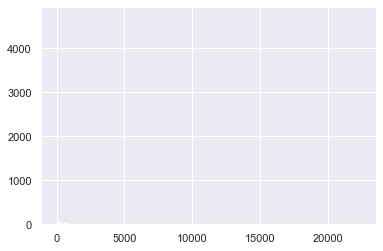

In [26]:
# visualization

sns.barplot(x=tmp.index, y=tmp.values)

In [27]:
# 30st most common tokens

tmp.head(30)

co            4703
http          4231
https          405
amp            342
like           341
û_             289
fire           230
get            226
via            216
2              204
people         189
new            183
one            181
news           166
emergency      145
disaster       143
video          136
would          133
body           127
police         122
still          120
3              119
u              117
crash          117
us             115
storm          114
back           113
day            112
know           112
california     110
dtype: int64

In [28]:
# 30st last common tokens

tmp.tail(30)

tydxauuenqhow          1
developer              1
hld5xlywbncrackdown    1
lmwkjsycgj             1
danhrothschild         1
greed                  1
takecare               1
cinla1964              1
windowgatribble        1
contrasts              1
foreboding             1
expansive              1
divisions              1
saturation             1
hue                    1
qbmcsjavt0fall         1
homebuyer              1
miscalculation         1
mwjcdkthere            1
workspace              1
forsee                 1
badkitty               1
lt3dave                1
specs                  1
lore                   1
destructiontruck       1
salvages               1
7b2wf6ovfk             1
newsrepublican         1
ymy4rskq3d             1
dtype: int64

In [29]:
tmp.describe()

count    22438.000000
mean         3.680096
std         43.379216
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max       4703.000000
dtype: float64

In [ ]:
# sns.displot(tmp)

/Users/alexandre.gazagnes/Desktop/cours/fr/analysez-des-donnes-textuelles/partie-1/tp/env/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

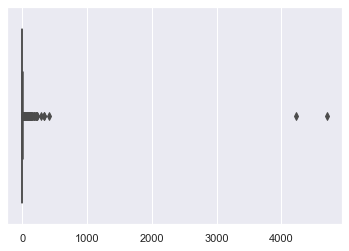

In [30]:
sns.boxplot(tmp)

## 3.2 List rare tokens

In [31]:
# unique words --> not usefull

tmp = pd.Series(corpus).value_counts()
list_unique_words = tmp[tmp==1]
list_unique_words[:30]

dub                   1
mxhrextrkh            1
ctijdpxabkdogs        1
splatling             1
foothill              1
designsso             1
thatrussianman        1
waterboarding         1
writingtips           1
salmanmydarling       1
ps3                   1
xboxhttps             1
qr1l2jyuez            1
nester                1
switching             1
dipping               1
pantherattackthere    1
dieanpink95           1
limitsabe             1
yu_nita99             1
sivan                 1
pantherattacki        1
camilla_33            1
uooygbb6az            1
akq4rwjfvlcheck       1
skippy6gaming         1
slttorrlhswho         1
craykain              1
lavalet               1
basalt                1
dtype: int64

In [32]:
len(list_unique_words)

16230

In [33]:
list_unique_words = list(list_unique_words.index)
list_unique_words[:30]

['dub',
 'mxhrextrkh',
 'ctijdpxabkdogs',
 'splatling',
 'foothill',
 'designsso',
 'thatrussianman',
 'waterboarding',
 'writingtips',
 'salmanmydarling',
 'ps3',
 'xboxhttps',
 'qr1l2jyuez',
 'nester',
 'switching',
 'dipping',
 'pantherattackthere',
 'dieanpink95',
 'limitsabe',
 'yu_nita99',
 'sivan',
 'pantherattacki',
 'camilla_33',
 'uooygbb6az',
 'akq4rwjfvlcheck',
 'skippy6gaming',
 'slttorrlhswho',
 'craykain',
 'lavalet',
 'basalt']

In [34]:
# save it for later

tmp = pd.DataFrame({"words" : list_unique_words})
tmp.to_csv("data/cleaned/unique_words.csv", index=False)

In [35]:
# idem for min 5 times

tmp = pd.Series(corpus).value_counts()
list_min_5_words = tmp[tmp<=5]
list_min_5_words[:30]

motorcycle     5
blind          5
ices           5
remain         5
md             5
mental         5
loves          5
depth          5
extra          5
leaves         5
subs           5
judge          5
earners        5
operations     5
reduced        5
catch          5
stephen        5
quest          5
reviews        5
responsible    5
motor          5
flying         5
smithsonian    5
52             5
34             5
losses         5
desires        5
pulls          5
mood           5
tubestrike     5
dtype: int64

In [36]:
len(list_min_5_words)

20275

In [37]:
# save it 

list_min_5_words = list(list_min_5_words.index)
tmp = pd.DataFrame({"words" : list_min_5_words})
tmp.to_csv("data/cleaned/min_5_words.csv", index=False)

In [38]:
# idem for min 10 times

tmp = pd.Series(corpus).value_counts()
list_min_10_words = tmp[tmp<=10]
list_min_10_words[:30]

able           10
trees          10
complete       10
udhampur       10
seattle        10
word           10
michael        10
yyc            10
amazon         10
grows          10
jeb            10
afghanistan    10
picture        10
abandoned      10
ice            10
main           10
emotional      10
sit            10
colour         10
nice           10
tent           10
extreme        10
lmao           10
ii             10
loved          10
seeks          10
extremely      10
issue          10
either         10
incident       10
dtype: int64

In [39]:
len(list_min_10_words)

21158

In [40]:
# save it 

list_min_10_words = list(list_min_10_words.index)
tmp = pd.DataFrame({"words" : list_min_10_words})
tmp.to_csv("data/cleaned/min_10_words.csv", index=False)

## 3.3 2nd Cleaning function

In [41]:
def process_text_2(doc, 
                   rejoin=False, 
                   list_rare_words=None, 
                   min_len_word=3,
                   force_is_alpha=True) : 
    """cf process_text_1 but with list_unique_words, min_len_word, and force_is_alpha
    
    positional arguments : 
    -----------------------
    doc : str : the document (aka a text in str format) to process
    
    opt args : 
    -----------------------
    rejoin : bool : if True return a string else return the list of tokens
    list_rare_words : list : a list of rare words to exclude
    min_len_word : int : the minimum length of words to not exclude
    force_is_alpha : int : if 1, exclude all tokens with a numeric character
    
    return : 
    ------------------------
    a string (if rejoin is True) or a list of tokens
    """
    
    # list_unique_words
    if not list_rare_words: 
        list_rare_words = []
        
    # lower
    doc = doc.lower().strip()
    
    # tokenize
    tokenizer = RegexpTokenizer(r"\w+")
    raw_tokens_list = tokenizer.tokenize(doc)
    
    # classics stopwords
    cleaned_tokens_list = [w for w in raw_tokens_list if w not in stop_words]
    
    
    ###########################################################
    ###########################################################
    
    # no rare tokens
    non_rare_tokens = [w for w in cleaned_tokens_list if w not in list_rare_words]
    
    # no more len words
    more_than_N =  [w for w in non_rare_tokens if len(w) >= min_len_word  ]
    
    # only alpha chars
    if force_is_alpha : 
        alpha_tokens = [w for w in more_than_N if w.isalpha()]
    else :
        alpha_tokens = more_than_N
        
    ###########################################################
    ###########################################################     
    
    
    # manage return type
    if rejoin : 
        return " ".join(alpha_tokens)
    
    return alpha_tokens

In [42]:
display_tokens_info(corpus)

nb tokens 82574, nb tokens uniques 22438
['deeds', 'reason', 'earthquake', 'may', 'allah', 'forgive', 'us', 'allforest', 'fire', 'near', 'la', 'ronge', 'sask', 'canadaall', 'residents', 'asked', 'shelter', 'place', 'notified', 'officers', 'evacuation', 'shelter', 'place', 'orders', 'expected13', '000', 'people', 'receive', 'wildfires', 'evacuation']


In [43]:
len(set(corpus))

22438

In [44]:
corpus = process_text_2(raw_corpus, 
                        list_rare_words=list_unique_words, 
                        rejoin=False)
display_tokens_info(corpus)

nb tokens 56509, nb tokens uniques 5705
['deeds', 'reason', 'earthquake', 'may', 'allah', 'forgive', 'fire', 'near', 'residents', 'asked', 'shelter', 'place', 'officers', 'evacuation', 'shelter', 'place', 'orders', 'people', 'receive', 'wildfires', 'evacuation', 'orders', 'california', 'got', 'sent', 'photo', 'alaska', 'smoke', 'wildfires', 'school']


In [45]:
len(set(corpus))

5705

## 3.4 Stem and Lem

Lemmatization is the process of grouping together the different inflected forms of a word so they can be analyzed as a single item. Lemmatization is similar to stemming but it brings context to the words. So it links words with similar meanings to one word. 

Stemming is the process of producing morphological variants of a root/base word. Stemming programs are commonly referred to as stemming algorithms or stemmers.

In [46]:
doc = "I have 3 dogs, they was all black. Now they are all white but one of my dog is my favorite"

In [47]:
tokenizer = RegexpTokenizer(r"\w+")
tokens = tokenizer.tokenize(doc.lower())
print(tokens)

['i', 'have', '3', 'dogs', 'they', 'was', 'all', 'black', 'now', 'they', 'are', 'all', 'white', 'but', 'one', 'of', 'my', 'dog', 'is', 'my', 'favorite']


In [48]:
trans = PorterStemmer()
trans_text = [trans.stem(i) for i in tokens ]
print(trans_text)

['i', 'have', '3', 'dog', 'they', 'wa', 'all', 'black', 'now', 'they', 'are', 'all', 'white', 'but', 'one', 'of', 'my', 'dog', 'is', 'my', 'favorit']


In [49]:
trans = WordNetLemmatizer()
trans_text = [trans.lemmatize(i) for i in tokens ]
print(trans_text)

['i', 'have', '3', 'dog', 'they', 'wa', 'all', 'black', 'now', 'they', 'are', 'all', 'white', 'but', 'one', 'of', 'my', 'dog', 'is', 'my', 'favorite']


## 3.5 3rd cleaning function

In [50]:
def process_text_3(doc, 
                   rejoin=False, 
                   lemm_or_stemm="stem",
                   list_rare_words=None, 
                   min_len_word=3,
                   force_is_alpha=True) : 
    """cf process_text_2 but with stemm or lem
    
    positional arguments : 
    -----------------------
    doc : str : the document (aka a text in str format) to process
    
    opt args : 
    -----------------------
    rejoin : bool : if True return a string else return the list of tokens
    lemm_or_stemm : str : if lem do lemmentize else stemmentize  
    list_rare_words : list : a list of rare words to exclude
    min_len_word : int : the minimum length of words to not exclude
    force_is_alpha : int : if 1, exclude all tokens with a numeric character
    
    return : 
    ------------------------
    a string (if rejoin is True) or a list of tokens
    """
    
 
    # list_unique_words
    if not list_rare_words: 
        list_rare_words = []
        
    # lower
    doc = doc.lower().strip()
    
    # tokenize
    tokenizer = RegexpTokenizer(r"\w+")
    raw_tokens_list = tokenizer.tokenize(doc)
    
    # classics stopwords
    cleaned_tokens_list = [w for w in raw_tokens_list if w not in stop_words]
    
    # no rare tokens
    non_rare_tokens = [w for w in cleaned_tokens_list if w not in list_rare_words]
    
    # no more len words
    more_than_N =  [w for w in non_rare_tokens if len(w) >= min_len_word  ]
    
    # only alpha chars
    if force_is_alpha : 
        alpha_tokens = [w for w in more_than_N if w.isalpha()]
    else :
        alpha_tokens = more_than_N

        
    ###########################################################
    ###########################################################
    
    # stem or lem
    if lemm_or_stemm == "lem" : 
        trans = WordNetLemmatizer()
        trans_text = [trans.lemmatize(i) for i in alpha_tokens ]
    else : 
        trans = PorterStemmer()
        trans_text = [trans.stem(i) for i in alpha_tokens ]
        
     ###########################################################
     ###########################################################
    
    
    # manage return type
    if rejoin : 
        return " ".join(trans_text)
    
    return trans_text
    

In [51]:
# +/- 3s

corpus = process_text_3(raw_corpus, rejoin=False, list_rare_words=list_unique_words)
pd.Series(corpus).sample(30)

50694         got
42406       shame
19202     earlier
49462      public
16369    children
36906         age
42015         see
51669        duti
37369        name
22621       charg
13131        wall
32980        live
27842        dept
36851      econom
21762       drown
27782     everyon
13293     respond
42638        pick
37490     america
52213    satellit
43186        http
4387      potenti
52973        http
25607       china
43376      altern
51646        wave
46732        fuck
52799     violent
24651        mall
38738     purchas
dtype: object

In [53]:
len(set(corpus))

4420

In [54]:
display_tokens_info(corpus)

nb tokens 56509, nb tokens uniques 4420
['deed', 'reason', 'earthquak', 'may', 'allah', 'forgiv', 'fire', 'near', 'resid', 'ask', 'shelter', 'place', 'offic', 'evacu', 'shelter', 'place', 'order', 'peopl', 'receiv', 'wildfir', 'evacu', 'order', 'california', 'got', 'sent', 'photo', 'alaska', 'smoke', 'wildfir', 'school']


## 3.5 Only english words

In [56]:
pd.Series( words.words()).sample(30)

129851           odontogen
183355           slumberer
6069             althionic
43159            cornelian
130880            onflemed
55022         disenjoyment
211869     unblemishedness
171906               Rusty
26139         brevirostral
39761              comanic
47662             cymulose
93953          inemendable
145585     phrenicogastric
7337      amyelencephalous
202728         throughknow
146950             Pindari
22313             billfish
86439               hogsty
33305            chalazian
50724         demissionary
22160       bigheartedness
164963            recubant
165698         refringency
61440         enallachrome
60183              elderly
207717         tripylarian
27599                  bur
182963           sleeplike
10184       antigovernment
56744             dollfish
dtype: object

In [57]:
len(set(words.words()))

235892

In [58]:
eng_words = [i.lower() for i in words.words()]
eng_words[:30]

['a',
 'a',
 'aa',
 'aal',
 'aalii',
 'aam',
 'aani',
 'aardvark',
 'aardwolf',
 'aaron',
 'aaronic',
 'aaronical',
 'aaronite',
 'aaronitic',
 'aaru',
 'ab',
 'aba',
 'ababdeh',
 'ababua',
 'abac',
 'abaca',
 'abacate',
 'abacay',
 'abacinate',
 'abacination',
 'abaciscus',
 'abacist',
 'aback',
 'abactinal',
 'abactinally']

In [59]:
len(set(eng_words))

234377

In [60]:
ps = PorterStemmer()
eng_words_stem = [ps.stem(i) for i in eng_words]
display_tokens_info(eng_words_stem)

nb tokens 236736, nb tokens uniques 178311
['a', 'a', 'aa', 'aal', 'aalii', 'aam', 'aani', 'aardvark', 'aardwolf', 'aaron', 'aaron', 'aaron', 'aaronit', 'aaronit', 'aaru', 'ab', 'aba', 'ababdeh', 'ababua', 'abac', 'abaca', 'abac', 'abacay', 'abacin', 'abacin', 'abaciscu', 'abacist', 'aback', 'abactin', 'abactin']


In [61]:
len(set(eng_words_stem))

178311

In [62]:
lm = WordNetLemmatizer()
eng_words_lem = [lm.lemmatize(i) for i in eng_words]
display_tokens_info(eng_words_lem)

nb tokens 236736, nb tokens uniques 233450
['a', 'a', 'aa', 'aal', 'aalii', 'aam', 'aani', 'aardvark', 'aardwolf', 'aaron', 'aaronic', 'aaronical', 'aaronite', 'aaronitic', 'aaru', 'ab', 'aba', 'ababdeh', 'ababua', 'abac', 'abaca', 'abacate', 'abacay', 'abacinate', 'abacination', 'abaciscus', 'abacist', 'aback', 'abactinal', 'abactinally']


In [ ]:
len(eng_words_lem)

## 3.6 4th cleaning function

In [63]:
def process_text_4(doc, 
                   rejoin=False, 
                   lemm_or_stemm="stem",
                   list_rare_words=None, 
                   min_len_word=3,
                   force_is_alpha=True, 
                   eng_words=None) : 
    """cf process_text_3 but with selection of only english words
    
    positional arguments : 
    -----------------------
    doc : str : the document (aka a text in str format) to process
    
    opt args : 
    -----------------------
    rejoin : bool : if True return a string else return the list of tokens
    lemm_or_stemm : str : if lem do lemmentize else stemmentize  
    list_rare_words : list : a list of rare words to exclude
    min_len_word : int : the minimum length of words to not exclude
    force_is_alpha : int : if 1, exclude all tokens with a numeric character
    eng_words : list : list of english words
    
    return : 
    ------------------------
    a string (if rejoin is True) or a list of tokens
    """
    
    # list_unique_words
    if not list_rare_words: 
        list_rare_words = []
        
    # lower
    doc = doc.lower().strip()
    
    # tokenize
    tokenizer = RegexpTokenizer(r"\w+")
    raw_tokens_list = tokenizer.tokenize(doc)
    
    # classics stopwords
    cleaned_tokens_list = [w for w in raw_tokens_list if w not in stop_words]
    
    # no rare tokens
    non_rare_tokens = [w for w in cleaned_tokens_list if w not in list_rare_words]
    
    # no more len words
    more_than_N =  [w for w in non_rare_tokens if len(w) >= min_len_word  ]
    
    # only alpha chars
    if force_is_alpha : 
        alpha_tokens = [w for w in more_than_N if w.isalpha()]
    else :
        alpha_tokens = more_than_N

    # stem or lem
    if lemm_or_stemm == "lem" : 
        trans = WordNetLemmatizer()
        trans_text = [trans.lemmatize(i) for i in alpha_tokens ]
    else : 
        trans = PorterStemmer()
        trans_text = [trans.stem(i) for i in alpha_tokens ]

        
    ###########################################################
    ###########################################################
        
    # in english 
    if eng_words :
        engl_text = [i for i in trans_text if i in eng_words]
    else :
        engl_text = trans_text
    
    ###########################################################
    ###########################################################
        
        
    #  return a list or a string
    if rejoin : 
        return " ".join(engl_text)
    
    return engl_text
    

In [64]:
# +/- 50s
corpus = process_text_4(raw_corpus, 
                        rejoin=False, 
                        list_rare_words=list_unique_words, 
                        eng_words=eng_words_stem)
display_tokens_info(corpus)

nb tokens 46983, nb tokens uniques 3461
['deed', 'reason', 'earthquak', 'may', 'allah', 'forgiv', 'fire', 'near', 'resid', 'ask', 'shelter', 'place', 'offic', 'evacu', 'shelter', 'place', 'order', 'peopl', 'receiv', 'wildfir', 'evacu', 'order', 'california', 'got', 'sent', 'photo', 'alaska', 'smoke', 'wildfir', 'school']


In [ ]:
len(set(corpus))

In [ ]:
len(df)

In [ ]:
list_unique_words[:30]

In [ ]:
len(list_unique_words)

In [ ]:
list_min_5_words[:30]

In [ ]:
len(list_min_5_words)

In [65]:
# +/- 30 sec
corpus = process_text_4(raw_corpus, 
                        rejoin=False, 
                        list_rare_words=list_min_5_words, 
                        eng_words=eng_words_stem)
display_tokens_info(corpus)

nb tokens 38405, nb tokens uniques 1440
['reason', 'earthquak', 'may', 'allah', 'fire', 'near', 'resid', 'ask', 'shelter', 'place', 'offic', 'evacu', 'shelter', 'place', 'order', 'peopl', 'wildfir', 'evacu', 'order', 'california', 'got', 'sent', 'photo', 'alaska', 'smoke', 'wildfir', 'school', 'updat', 'california', 'close']


In [ ]:
len(set(corpus))

In [ ]:
tmp = pd.Series(corpus).value_counts()
tmp

In [ ]:
# sns.barplot(tmp.index, tmp.values)

## 3.7 Wordcloud

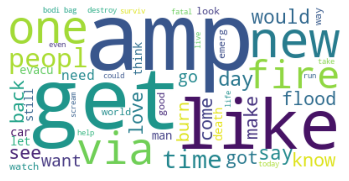

In [66]:
wordcloud = WordCloud(background_color='white', 
                      stopwords=[], 
                      max_words=50).generate(" ".join(corpus))
plt.imshow(wordcloud)
plt.axis("off")
plt.show();

# 4. Divide the corpus

## 4.1 Separate 0 / 1

In [67]:
# df_0 df_1

df_1 = df[df.target == 1]
df_0 = df[df.target == 0]

In [68]:
df_0.head()

,text,target
15,What's up man?,0
16,I love fruits,0
17,Summer is lovely,0
18,My car is so fast,0
19,What a goooooooaaaaaal!!!!!!,0


In [69]:
df_1.head()

,text,target
0,Our Deeds are the Reason of this #earthquake M...,1
1,Forest fire near La Ronge Sask. Canada,1
2,All residents asked to 'shelter in place' are ...,1
3,"13,000 people receive #wildfires evacuation or...",1
4,Just got sent this photo from Ruby #Alaska as ...,1


In [70]:
corpus_1 = " ".join(df_1.text)
corpus_0 = " ".join(df_0.text)

In [71]:
corpus_1[:1000]

"Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all Forest fire near La Ronge Sask. Canada All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected 13,000 people receive #wildfires evacuation orders in California  Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school  #RockyFire Update => California Hwy. 20 closed in both directions due to Lake County fire - #CAfire #wildfires #flood #disaster Heavy rain causes flash flooding of streets in Manitou, Colorado Springs areas I'm on top of the hill and I can see a fire in the woods... There's an emergency evacuation happening now in the building across the street I'm afraid that the tornado is coming to our area... Three people died from the heat wave so far Haha South Tampa is getting flooded hah- WAIT A SECOND I LIVE IN SOUTH TAMPA WHAT AM I GONNA DO WHAT AM I GONNA DO FVCK #flooding #raining #flooding #Florida

In [72]:
corpus_0[:1000]

"What's up man? I love fruits Summer is lovely My car is so fast What a goooooooaaaaaal!!!!!! this is ridiculous.... London is cool ;) Love skiing What a wonderful day! LOOOOOOL No way...I can't eat that shit Was in NYC last week! Love my girlfriend Cooool :) Do you like pasta? The end! We always try to bring the heavy. #metal #RT http://t.co/YAo1e0xngw Crying out for more! Set me ablaze On plus side LOOK AT THE SKY LAST NIGHT IT WAS ABLAZE http://t.co/qqsmshaJ3N @PhDSquares #mufc they've built so much hype around new acquisitions but I doubt they will set the EPL ablaze this season. Ablaze for you Lord :D Check these out: http://t.co/rOI2NSmEJJ http://t.co/3Tj8ZjiN21 http://t.co/YDUiXEfIpE http://t.co/LxTjc87KLS #nsfw on the outside you're ablaze and alive\nbut you're dead inside Had an awesome time visiting the CFC head office the ancop site and ablaze. Thanks to Tita Vida for taking care of us ?? SOOOO PUMPED FOR ABLAZE ???? @southridgelife I wanted to set Chicago ablaze with my pre

## 4.2 Process boths of them

In [73]:
corpus_1 = process_text_4(corpus_1, 
                          rejoin=False, 
                          list_rare_words=list_min_5_words, 
                          eng_words=eng_words_stem)

corpus_0 = process_text_4(corpus_0, 
                          rejoin=False, 
                          list_rare_words=list_min_5_words, 
                          eng_words=eng_words_stem)

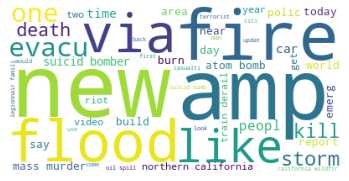

In [74]:
wordcloud = WordCloud(background_color='white', 
                      stopwords=[], 
                      max_words = 50).generate(" ".join(corpus_1))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

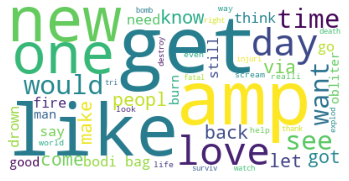

In [75]:
wordcloud = WordCloud(background_color='white', 
                      stopwords=[], max_words=50).generate(" ".join(corpus_0))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [ ]:
pd.Series(corpus_1).value_counts().head(20)

In [ ]:
pd.Series(corpus_0).value_counts().head(20)

In [76]:
n = 10
doublons = [i for i in pd.Series(corpus_1).value_counts().head(n).index 
     if i in pd.Series(corpus_0).value_counts().head(n).index]
doublons

['amp']

In [79]:
n = 20
doublons = [i for i in pd.Series(corpus_1).value_counts().head(n).index 
     if i in pd.Series(corpus_0).value_counts().head(n).index]
doublons

['amp', 'via', 'like', 'peopl']

## 4.3 5th cleaning function

In [83]:
def process_text_5(doc, 
                   rejoin=True, 
                   lemm_or_stemm = "stem", 
                   list_rare_words=None, 
                   min_len_word=3, 
                   eng_words=None, 
                   extra_words=None) : 
    """df v4 but exclude an extra list"""
 
    # list_unique_words
    if not list_rare_words: 
        list_rare_words = []
        
    # extra_words
    if not extra_words: 
        extra_words = []
        
    # lower and strip
    doc = doc.lower().strip()
    
    # tokenize
    tokenizer = RegexpTokenizer(r"\w+")
    raw_tokens_list = tokenizer.tokenize(doc)
    
    # remove stop words
    cleaned_tokens_list = [w for w in raw_tokens_list if w not in stop_words]
    
    # drop rare tokens
    non_rare_tokens_list = [w for w in cleaned_tokens_list if w not in list_rare_words]
    
    # keep only len word > N
    more_than_N =  [w for w in non_rare_tokens_list if len(w) >= 3 ]
    
    # keep only alpha not num
    alpha_num = [w for w in more_than_N if w.isalpha()]
    
    # stem or lem
    if lemm_or_stemm == "lem" : 
        trans = WordNetLemmatizer()
        trans_text = [trans.lemmatize(i) for i in alpha_num ]
    else : 
        trans = PorterStemmer()
        trans_text = [trans.stem(i) for i in alpha_num ]
        
    # in english 
    if eng_words :
        engl_text = [i for i in trans_text if i in eng_words]
    else :
        engl_text = trans_text
        
        
    ##########################################
    ##########################################
    
    # drop extra_words tokens
    final = [w for w in engl_text if w not in extra_words]
    
    ##########################################
    ##########################################
    
    
    #  return a list or a string
    if rejoin : 
        return " ".join(final)
    
    return engl_text

# 5. Final clean

In [81]:
def final_clean(doc) : 
    """perform our final cleaning"""
    
    new_doc = process_text_5(doc,
                             rejoin=True, 
                             lemm_or_stemm="stem", 
                             list_rare_words=list_min_5_words, 
                             eng_words=eng_words_stem, 
                             extra_words=doublons)
    return  new_doc

In [84]:
# df["clean_text"] = df.text.apply(final_clean)

df["clean_text"] = df.text.parallel_apply(final_clean)

In [85]:
df.sample(20)

,text,target,clean_text
2244,Businesses are|deluged with invoices. Make y u...,0,busi delug invoic make stand colour shape rise...
4174,@HearItFromPatty Also pls help us w/ our campa...,0,also help public hazard
840,That horrible moment when u open up the dryer ...,0,horribl moment open look blizzard left piec
4916,13 reasons why we love women in the military ...,0,reason love militari
355,INFANTRY Mens Lume Dial Army Analog Quartz Wri...,0,infantri armi watch sport blue full rea
3315,Is it seclusion when a class is evacuated and ...,1,class evacu child left alon class forc
490,Telnet attacked from 124.13.172.40 (STREAMYX-H...,1,attack home southern
1352,Ted Cruz fires back at Jeb &amp; Bush: ÛÏWe l...,0,fire back bush lose republican video
2551,@engineermataRAI ate mataas kc rating..but the...,0,think destroy stori along
1610,The @POTUS economy continues to collapse.,1,economi continu collaps


In [86]:
sub_df = df[df.target == 1]
for idx, ser in sub_df.sample(10).iterrows() : 
    print(ser['text'])
    print(ser['clean_text'])
    print()

Student electrocuted to death in school campus http://t.co/ryah8Fni5Q
student electrocut death school

My last two weather pics from the storm on August 2nd. People packed up real fast after the temp dropped and winds picked up.
last two weather pic storm august real fast drop wind pick

Suicide bomber kills 15 in Saudi security site mosque http://t.co/ETyZY8GB2A #mercados
suicid bomber kill secur site mosqu

VICTORINOX SWISS ARMY DATE WOMEN'S RUBBER MOP WATCH 241487 http://t.co/yFy3nkkcoH http://t.co/KNEhVvOHVK
armi date rubber watch

@FoxNews let me report it to u people instead Mr.Obama just declares CNMI federal disaster area post typhoon soudelor. U guys 2slow2report.
let report instead declar disast area post typhoon guy

Watch This Airport Get Swallowed Up By A Sandstorm In Under A Minute http://t.co/C9t2F6DLtM
watch airport get swallow sandstorm minut

Kaduna Begins Demolition Of Buildings On Govt School Lands
http://t.co/77cIWXABVAÛ_t-school-lands/
demolit build school land s

In [87]:
sub_df = df[df.target == 0]
for idx, ser in sub_df.sample(10).iterrows() : 
    print(ser['text'])
    print(ser['clean_text'])
    print()

Man Who Buried Dog Alive Thought No One Would Find Her But She Was Rescued Just In Time http://t.co/SahQ5UOAHW
man dog aliv thought one would find rescu time

@cameronhigdon34 I can't drown my demons they know how to swim.
drown know

@ShipsXAnchors IDEK HOW IS  THERE PEOPLE WHO ACTUALLY THINK HE'S A TERRORIST
actual think terrorist

My sis can now sit on a cam w/o panicking https://t.co/GiYaaD7dcc
sit panick

Owner of Chicago-Area Gay Bar Admits to Arson Scheme http://t.co/UBFr1URAFc #LGBT | https://t.co/AlnV51d95x
area gay bar admit arson scheme

Mere sight of a gun makes police ÛÒ and public ÛÒ more aggressive experts say http://t.co/N4NEUIyt2k
gun make polic public expert say

@noahshack he's hot &amp; he can sing I'm screaming??????
hot sing scream

But no lies though. It's pays to be the oldest sometimes. Like being the first to get a car and have no curfew. #freedom #donthate
lie though sometim first get car curfew

@missambear your Tweet was quoted by @WIRED  http://t.co/E90J

In [88]:
df.isna().mean()

text          0.0
target        0.0
clean_text    0.0
dtype: float64

In [89]:
df.to_csv("data/cleaned/final_df.csv", index=False)